In [1]:
import pandas as pd
import time
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder

from sklearn.model_selection import train_test_split
from sklearn.decomposition import TruncatedSVD
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import Normalizer
from sklearn.feature_extraction.text import TfidfVectorizer

from sklearn.linear_model import RidgeClassifier

In [2]:
df = pd.read_csv('DS data 032321.csv')
df.info()
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 959 entries, 0 to 958
Data columns (total 16 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   datePosted                     959 non-null    object
 1   description                    959 non-null    object
 2   employmentType                 959 non-null    object
 3   experienceRequirements         959 non-null    object
 4   hiringOrganization             959 non-null    object
 5   identifier                     959 non-null    object
 6   industry                       958 non-null    object
 7   jobLocation                    959 non-null    object
 8   skills                         5 non-null      object
 9   title                          959 non-null    object
 10  validThrough                   959 non-null    object
 11  jobLocationType                128 non-null    object
 12  applicantLocationRequirements  128 non-null    object
 13  estim

,datePosted,description,employmentType,experienceRequirements,hiringOrganization,identifier,industry,jobLocation,skills,title,validThrough,jobLocationType,applicantLocationRequirements,estimatedSalary,baseSalary,desc_html
0,2021-03-23T16:03:21.000Z,Genuent is hiring a Data Scientist/Data Engine...,FULL_TIME,Mid-Senior level,"{'@type': 'Organization', 'name': 'Genuent', '...","{'@type': 'PropertyValue', 'name': 'Genuent', ...",Staffing and Recruiting,"{'@type': 'Place', 'address': {'@type': 'Posta...",NaN,Data Scientist - REMOTE,2021-04-22T16:03:20.000Z,NaN,NaN,NaN,NaN,<p>Genuent is hiring a Data Scientist/Data Eng...
1,2021-03-23T17:02:32.000Z,Ayata is developing its Prescriptive Analytics...,FULL_TIME,Entry level,"{'@type': 'Organization', 'name': 'Ayata', 'sa...","{'@type': 'PropertyValue', 'name': 'Ayata', 'v...","Information Technology and Services,Computer S...","{'@type': 'Place', 'address': {'@type': 'Posta...",NaN,ML/AI/NLP Data Scientist,2021-04-22T17:02:32.000Z,NaN,NaN,NaN,NaN,Ayata is developing its Prescriptive Analytics...
2,2021-03-23T14:35:46.000Z,"Our team, part of the Customer Success Enginee...",FULL_TIME,Not Applicable,"{'@type': 'Organization', 'name': 'Microsoft',...","{'@type': 'PropertyValue', 'name': 'Microsoft'...","Computer Hardware,Computer Software,Informatio...","{'@type': 'Place', 'address': {'@type': 'Posta...",NaN,Data & Applied Scientist,2021-04-22T14:35:45.000Z,NaN,NaN,NaN,NaN,"Our team, part of the Customer Success Enginee..."
3,2021-03-22T20:24:23.000Z,Headspace is looking for a Data Scientist to h...,FULL_TIME,Entry level,"{'@type': 'Organization', 'name': 'Headspace I...","{'@type': 'PropertyValue', 'name': 'Headspace ...","Marketing and Advertising,Computer Software,In...","{'@type': 'Place', 'address': {'@type': 'Posta...",NaN,Data Scientist (Remote),2021-04-21T20:24:22.000Z,TELECOMMUTE,"{'@type': 'Country', 'name': 'United States'}",NaN,NaN,<em>Headspace is looking for a Data Scientist ...
4,2021-03-23T09:07:02.000Z,DescriptionThe AWS Applications team builds po...,FULL_TIME,Not Applicable,"{'@type': 'Organization', 'name': 'Amazon Web ...","{'@type': 'PropertyValue', 'name': 'Amazon Web...","Computer Software,Information Technology and S...","{'@type': 'Place', 'address': {'@type': 'Posta...",NaN,Data Scientist,2021-04-22T09:07:01.000Z,NaN,NaN,"{'@type': 'MonetaryAmount', 'currency': 'USD',...",NaN,<strong><u>Description<br><br></u></strong>The...


# Prepare the explanatory variables and target variable

In [3]:
# Labels
labels = df.experienceRequirements.value_counts()
labels

Entry level         465
Mid-Senior level    222
Not Applicable      154
Associate           108
Internship            6
Director              4
Name: experienceRequirements, dtype: int64

In [4]:
labels = labels.index # get the index of labels
labels = labels[:4] # pick the 1st 5 label
labels

Index(['Entry level', 'Mid-Senior level', 'Not Applicable', 'Associate'], dtype='object')

In [5]:
df = df[df.experienceRequirements.isin(labels)].copy()
df.info()
df.head(3)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 949 entries, 0 to 958
Data columns (total 16 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   datePosted                     949 non-null    object
 1   description                    949 non-null    object
 2   employmentType                 949 non-null    object
 3   experienceRequirements         949 non-null    object
 4   hiringOrganization             949 non-null    object
 5   identifier                     949 non-null    object
 6   industry                       948 non-null    object
 7   jobLocation                    949 non-null    object
 8   skills                         5 non-null      object
 9   title                          949 non-null    object
 10  validThrough                   949 non-null    object
 11  jobLocationType                126 non-null    object
 12  applicantLocationRequirements  126 non-null    object
 13  estim

,datePosted,description,employmentType,experienceRequirements,hiringOrganization,identifier,industry,jobLocation,skills,title,validThrough,jobLocationType,applicantLocationRequirements,estimatedSalary,baseSalary,desc_html
0,2021-03-23T16:03:21.000Z,Genuent is hiring a Data Scientist/Data Engine...,FULL_TIME,Mid-Senior level,"{'@type': 'Organization', 'name': 'Genuent', '...","{'@type': 'PropertyValue', 'name': 'Genuent', ...",Staffing and Recruiting,"{'@type': 'Place', 'address': {'@type': 'Posta...",NaN,Data Scientist - REMOTE,2021-04-22T16:03:20.000Z,NaN,NaN,NaN,NaN,<p>Genuent is hiring a Data Scientist/Data Eng...
1,2021-03-23T17:02:32.000Z,Ayata is developing its Prescriptive Analytics...,FULL_TIME,Entry level,"{'@type': 'Organization', 'name': 'Ayata', 'sa...","{'@type': 'PropertyValue', 'name': 'Ayata', 'v...","Information Technology and Services,Computer S...","{'@type': 'Place', 'address': {'@type': 'Posta...",NaN,ML/AI/NLP Data Scientist,2021-04-22T17:02:32.000Z,NaN,NaN,NaN,NaN,Ayata is developing its Prescriptive Analytics...
2,2021-03-23T14:35:46.000Z,"Our team, part of the Customer Success Enginee...",FULL_TIME,Not Applicable,"{'@type': 'Organization', 'name': 'Microsoft',...","{'@type': 'PropertyValue', 'name': 'Microsoft'...","Computer Hardware,Computer Software,Informatio...","{'@type': 'Place', 'address': {'@type': 'Posta...",NaN,Data & Applied Scientist,2021-04-22T14:35:45.000Z,NaN,NaN,NaN,NaN,"Our team, part of the Customer Success Enginee..."


In [7]:
le = LabelEncoder()
y = le.fit_transform(df.experienceRequirements)
print(le.classes_)
df.experienceRequirements[:3],y[:3]

['Associate' 'Entry level' 'Mid-Senior level' 'Not Applicable']


(0    Mid-Senior level
 1         Entry level
 2      Not Applicable
 Name: experienceRequirements, dtype: object,
 array([2, 1, 3]))

In [22]:
vectorizer = TfidfVectorizer(stop_words='english',
                             ngram_range=(2,2),
                             norm='l2'
                             )
X = vectorizer.fit_transform(df.description)
print(vectorizer.get_feature_names())
print(X.shape)
X.toarray()[:5,:5]

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



array([[0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0.]])

In [16]:
svd = TruncatedSVD(2)
normalizer = Normalizer(copy=False)
lsa = make_pipeline(svd, normalizer)

X_lsa = lsa.fit_transform(X)
explained_variance = svd.explained_variance_ratio_.sum()
print("Explained variance of the SVD step: {}%".format(
    int(explained_variance * 100)))

print()

Explained variance of the SVD step: 1%



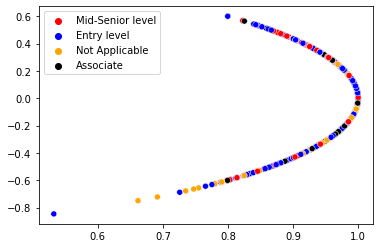

In [17]:
sns.scatterplot(x=X_lsa[:,0],
                y=X_lsa[:,1],
                hue=le.inverse_transform(y),
                palette=['red','blue','orange','black'])
plt.show()

In [18]:
svd = TruncatedSVD(100)
normalizer = Normalizer(copy=False)
lsa = make_pipeline(svd, normalizer)

X_lsa = lsa.fit_transform(X)
explained_variance = svd.explained_variance_ratio_.sum()
print("Explained variance of the SVD step: {}%".format(
    int(explained_variance * 100)))

print()

Explained variance of the SVD step: 30%



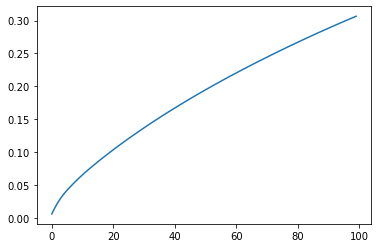

In [19]:
plt.plot(svd.explained_variance_ratio_.cumsum())

In [20]:
X_train, X_test, y_train, y_test = train_test_split(X_lsa,
                                                    y,
                                                    test_size=0.2,
                                                    stratify=y,
                                                    random_state=42)
print(X_train.shape, X_test.shape)

(759, 100) (190, 100)


In [21]:
clf = RidgeClassifier().fit(X_train, y_train)
clf.score(X_train, y_train), clf.score(X_test, y_test)

(0.6337285902503293, 0.47368421052631576)